In [2]:
import math
import datasets
import IBM1 as ibm1
import debug_helpers
import variational as var

# pretty print variabeles on line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
# Run variational bayes for a toy example 
iterations = 10 
alpha = 0.1 
ELBO = True
s_t_pairs, s_vocabulary, t_vocabulary = datasets.example_data_null_words()
print(s_t_pairs[0])
val_sentence_pairs = [(
['<NULL>', 'Buch', 'klein', 'das', 'Haus'],
['the', 'small', 'house', 'book']
)]
ref_alignments = [[
{(3, 1), (2, 2), (4, 3), (1, 4)},
{(3, 1), (2, 2), (4, 3), (1, 4)}
]]
(lprobs, ELBOS, AERS) = var.EM(s_t_pairs, s_vocabulary, t_vocabulary,iterations,val_sentence_pairs,
                ref_alignments, alpha, ELBO,fn_debug = debug_helpers.print_ELBO)

(['<NULL>', 'das', 'Haus'], ['the', 'house'])
iteration    ELBO     AER    time
0 -60.778 0.75000 09:49
1 -50.555 0.14286 09:49
2 -48.662 0.14286 09:49
3 -50.321 0.14286 09:49
4 -51.566 0.14286 09:49
5 -51.075 0.14286 09:49
6 -49.891 0.14286 09:49
7 -49.644 0.14286 09:49
8 -49.720 0.14286 09:49
9 -49.722 0.14286 09:49


In [5]:
# Read in the data 

# s_t_pairs, s_vocabulary, t_vocabulary = datasets.training_data()
# val_sentence_pairs = datasets.validation_data(s_vocabulary, t_vocabulary)
# reference_alignments = datasets.validation_alignments()

In [3]:
import persistence as per
# Save the data 
# per.save(val_sentence_pairs, 'val_sent_pair')
# per.save(reference_alignments, 'val_ref_align')
# per.save(s_t_pairs, 's_t_pairs')
# per.save(s_vocabulary, 's_voc')
# per.save(t_vocabulary, 't_voc')
# Load the data 
ref_alignments = per.load('val_ref_align')
val_sentence_pairs = per.load('val_sent_pair')
s_t_pairs = per.load('s_t_pairs')
s_voc = per.load('s_voc')
t_voc = per.load('t_voc')

In [6]:
iterations = 5
alpha = [0.1, 0.01, 0.001] 
ELBO = False 
(lprobs, ELBOS, AERS_0) = var.EM(s_t_pairs, s_voc, t_voc,iterations,val_sentence_pairs,
                ref_alignments, alpha[0], ELBO,fn_debug = debug_helpers.print_ELBO)
per.save(AERS_0, 'alpha_0')
print('alpha 0 done')

(lprobs, ELBOS, AERS_1) = var.EM(s_t_pairs, s_voc, t_voc,iterations,val_sentence_pairs,
                ref_alignments, alpha[1], ELBO,fn_debug = debug_helpers.print_ELBO)
per.save(AERS_1, 'alpha_1')
print('alpha 1 done')

(lprobs, ELBOS, AERS_2) = var.EM(s_t_pairs, s_voc, t_voc,iterations,val_sentence_pairs,
                ref_alignments, alpha[2], ELBO,fn_debug = debug_helpers.print_ELBO)
per.save(AERS_2, 'alpha_2')
print('alpha 2 done')

iteration    ELBO     AER    time
0 0.000 0.92918 09:06
1 0.000 0.36269 09:08
2 0.000 0.34509 09:11
3 0.000 0.33843 09:13
4 0.000 0.33238 09:16
alpha 0 done
iteration    ELBO     AER    time
0 0.000 0.92918 09:19
1 0.000 0.37405 09:21
2 0.000 0.36988 09:24
3 0.000 0.35728 09:27
4 0.000 0.35345 09:29
alpha 1 done
iteration    ELBO     AER    time
0 0.000 0.92918 09:32
1 0.000 0.37784 09:34
2 0.000 0.37274 09:37
3 0.000 0.35920 09:39
4 0.000 0.35441 09:42
alpha 2 done


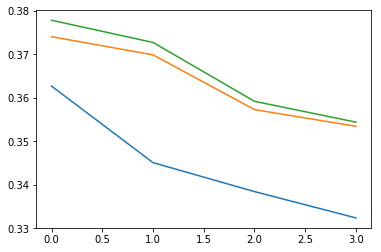

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
alpha0 = per.load('alpha_0')
alpha1 = per.load('alpha_1')
alpha2 = per.load('alpha_2')
plt.plot(alpha0[1:])
plt.plot(alpha1[1:])
plt.plot(alpha2[1:])

TypeError: 'float' object is not subscriptable